In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from tensorflow.keras import datasets,losses
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping

## Data Prepare

In [17]:
# Load dataset from mnist
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = datasets.mnist.load_data()

# Reshape dataset
X_train_images = X_train_images.reshape(60000,28,28,1)
X_test_images = X_test_images.reshape(10000,28,28,1)

# Normalize dataset
X_train_images = X_train_images/255.0
X_test_images = X_test_images/255.0 

print("TRAIN IMAGES: ", X_train_images.shape)
print("TEST IMAGES: ", X_test_images.shape)


TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


## Model

In [20]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid')
])

d:\AI\Projects\DL\Hand_witten_digit_recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Compile

In [ ]:
# EarlyStopping
early_stopping_callbacks = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [24]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,210 (184.41 KB)

 Trainable params: 47,210 (184.41 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [35]:
history = model.fit(
    X_train_images,y_train_labels,
    validation_data = (X_test_images, y_test_labels),
    epochs = 15,
    callbacks = early_stopping_callbacks
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9850 - val_loss: 0.0819
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9963 - loss: 0.0105 - val_accuracy: 0.9851 - val_loss: 0.0761
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9819 - val_loss: 0.0839
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9880 - val_loss: 0.0719
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9970 - loss: 0.0097 - val_accuracy: 0.9836 - val_loss: 0.0957
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9880 - val_loss: 0.0782
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9871 - val_loss: 0.0735
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9970 -

## Visualize Training Result

Text(0.5, 1.0, 'Training Accuracy and Loss')

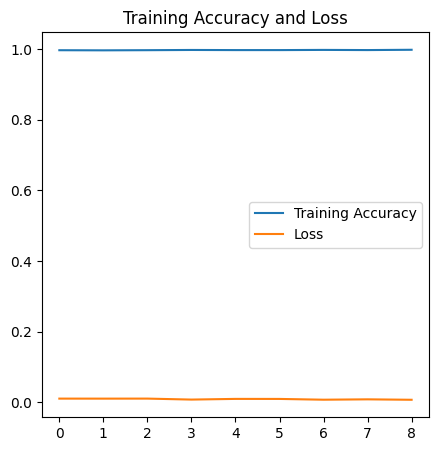

In [44]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(9)

plt.figure(figsize=(5, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

## Test Model

Predicted Digit: 9


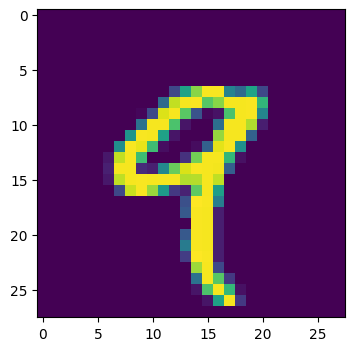

In [77]:
image = (X_train_images[4]).reshape(1,28,28,1)
y_prob = model.predict(image, verbose=0)      # probabilities for each class
model_pred = y_prob.argmax(axis=-1)           # pick the class with max probability

plt.figure(figsize=(4,4))
plt.imshow(image.reshape(28,28))
print(f"Predicted Digit: {model_pred[0]}")

Predicted Digit: 0


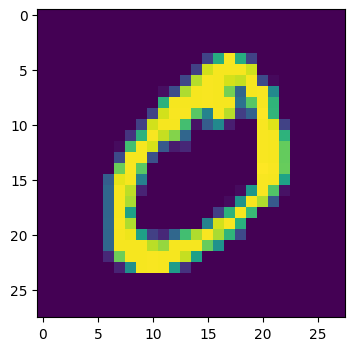

In [76]:
image = (X_train_images[1]).reshape(1,28,28,1)
y_prob = model.predict(image, verbose=0)      # probabilities for each class
model_pred = y_prob.argmax(axis=-1)           # pick the class with max probability

plt.figure(figsize=(4,4))
plt.imshow(image.reshape(28,28))
print(f"Predicted Digit: {model_pred[0]}")

Test images array shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


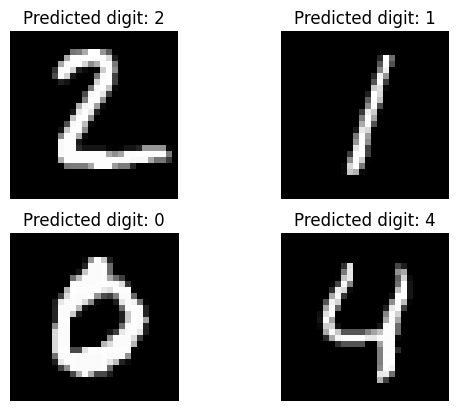

In [68]:

images = X_test_images[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    y_prob = model.predict(test_image, verbose=0)
    prediction = y_prob.argmax(axis=-1)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()


## Save Model

In [69]:
model.save("hwd_recognition_model.h5")

## Load model and Predict Digit

Predicted Digit: 1


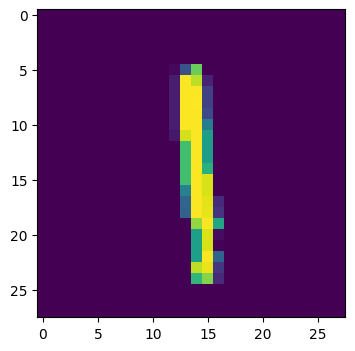

In [75]:
loaded_model = load_model("hwd_recognition_model.h5")

image = (X_train_images[8]).reshape(1,28,28,1)
y_prob = model.predict(image, verbose=0)      
model_pred = y_prob.argmax(axis=-1)           

plt.figure(figsize=(4,4))
plt.imshow(image.reshape(28,28))
print(f"Predicted Digit: {model_pred[0]}")
